### Read CSV data file and see overall info

In [63]:
import pandas as pd

df = pd.read_csv('Health data.csv')

In [64]:
df

,pulse,body temperature,SpO2,Status
0,70,36.0,99,0
1,70,36.0,98,0
2,70,36.0,97,0
3,70,36.0,96,0
4,70,36.1,100,0
...,...,...,...,...
5904,88,38.9,85,2
5905,88,38.9,86,2
5906,88,38.9,87,2
5907,88,38.9,88,2


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pulse             5909 non-null   int64  
 1   body temperature  5909 non-null   float64
 2   SpO2              5909 non-null   int64  
 3   Status            5909 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 184.8 KB


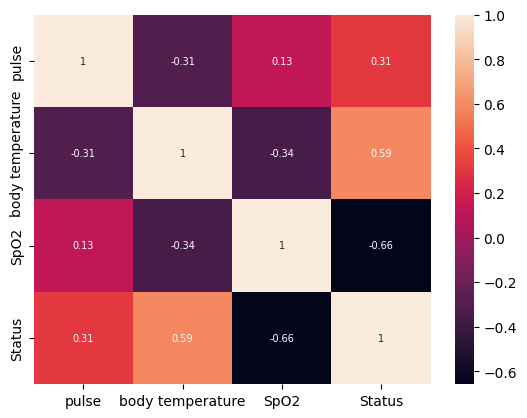

In [66]:
import seaborn as sns

p1 = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7})

## Pre-processing
### Getting X and Y, then split into training and testing dataset

In [67]:
y = df['Status']
print(y)
X = df.drop('Status', axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
5904    2
5905    2
5906    2
5907    2
5908    2
Name: Status, Length: 5909, dtype: int64


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train, X_test, y_train, y_test)

      pulse  body temperature  SpO2
2133     84              37.3    96
1842     80              38.0    95
1400     75              37.0    97
4095     72              39.2    94
355      77              36.1    99
...     ...               ...   ...
862      87              36.2    97
531      80              36.6    98
4728     82              39.8    91
4645     80              40.4    92
3118     82              36.9    91

[4136 rows x 3 columns]       pulse  body temperature  SpO2
2430     87              38.7    95
2880     77              36.0    93
3434    140              36.8    97
190      73              36.8    99
5537     80              37.5    88
...     ...               ...   ...
901      88              36.0    98
762      85              36.2    97
1499     76              37.5    98
2457     88              37.4    96
5109     88              40.1    94

[1773 rows x 3 columns] 2133    1
1842    1
1400    1
4095    2
355     0
       ..
862     0
531     0
4728  

## Training
### Fit Logistic Regressor and Neural Network with training sets

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1500
).fit(X_train, y_train)

In [70]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(
    max_iter=1500
).fit(X_train, y_train)

## Optimisation
### Grid Search to find best hyperparameter to use

In [75]:
from sklearn.model_selection import GridSearchCV

lrParams = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

lrGridSearch = GridSearchCV(estimator=lr, param_grid=lrParams, n_jobs=4, scoring='accuracy')
grid_result = lrGridSearch.fit(X, y)

In [76]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.920127 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.917591 (0.063973) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910479 (0.060687) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.917590 (0.059546) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.917929 (0.062932) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911663 (0.059897) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.918097 (0.059615) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.918944 (0.059908) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.912848 (0.057745) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.920127 (0.056228) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.918774 (0.058343) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914034 (0.058275) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.916911 (0.047857) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.896262 (0.053729) wit

## Testing
### Get accuracy score

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lr.predict(X_test)) * 100

96.72870840383531

In [77]:
accuracy_score(y_test, lrGridSearch.predict(X_test))

0.9543147208121827

In [51]:
accuracy_score(y_test, mlpc.predict(X_test)) * 100

97.0107163000564

## Predict

In [92]:
lrGridSearch.predict(pd.DataFrame({
    'pulse': [65],
    'body temperature': [37],
    'SpO2': [92]
}))[0]

1

## Export
### Export the models as .pkl files using joblib

In [ ]:
from joblib import Parallel, delayed 
import joblib 

joblib.dump(lr, 'logisticRegression.pkl')
joblib.dump(lrGridSearch, 'logisticRegressionGridSearch.pkl')
joblib.dump(mlpc, 'MLPClassifier.pkl')